In [2]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = np.load('/fastio2/dasha/double_pulse/data.npy', mmap_mode='r')

In [4]:
data = data.reshape(data.shape[0])

In [5]:
pos = data['meson']['position']

In [6]:
pos.shape

(1476948, 3)

In [7]:
data_cont = data[np.all(pos < 500, axis =1) & np.all(pos > -500, axis =1)]

In [8]:
data_cont.shape

(1030490,)

In [9]:
data_cont['meson'][:10]

array([(        15, 623558.4   , [-173.23062  ,  486.46643  ,  410.74902  ], [0.7196309 , 3.221025  ],  9590.049,  1.6786724 ),
       (        15,  31720.547 , [-196.42699  , -423.03912  , -226.94145  ], [0.27639025, 2.565376  ],  9749.265,  0.645834  ),
       (4294967281,  29602.137 , [ 336.4368   , -187.77905  ,  297.09894  ], [0.60694706, 5.8746014 ], 20708.602,  0.01649226),
       (4294967281, 387455.84  , [-440.9561   , -385.1875   , -183.52654  ], [0.743403  , 6.233176  ],  9544.243, 13.542296  ),
       (        15,   4539.9307, [-317.13992  ,  228.9067   ,  181.84428  ], [2.2512085 , 1.5315467 ], 14257.316,  0.63758755),
       (4294967281,  15067.008 , [ 177.7996   , -216.46272  , -332.74414  ], [1.235385  , 3.802682  ],  9894.103,  0.88971543),
       (4294967281,  12754.623 , [ 345.39532  ,  177.35832  , -224.7707   ], [2.2877822 , 5.5212502 ],  9617.191,  2.9877505 ),
       (        15,   3894.9194, [-282.95703  ,    1.8634845,  130.43333  ], [2.6067154 , 3.5096169 ],  

In [10]:
w = np.ones(data.shape[0])/data.shape[0]
wc = np.ones(data_cont.shape[0])/data_cont.shape[0]

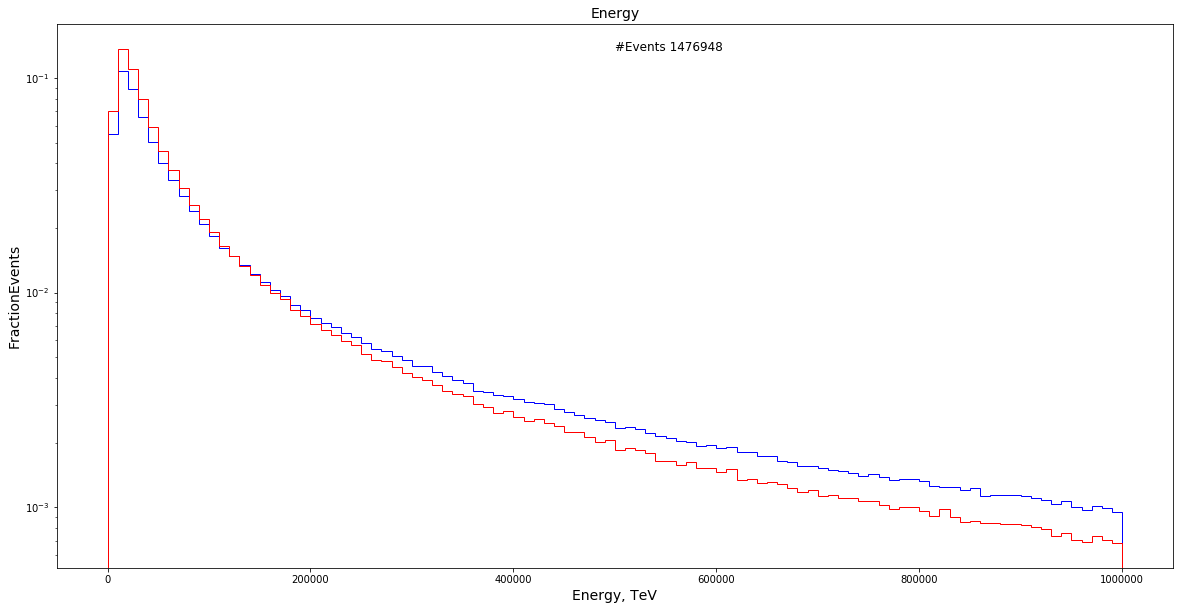

In [48]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Energy", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('Energy, TeV', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['neutrino']['energy'], bins =100,  weights = w, histtype = 'step',edgecolor ='b', lw =1, fc=(0, 0, 1, 0.2), range = [0,1000000], label = "Nu")  
ax.hist(data_cont['neutrino']['energy'], bins =100, weights = wc, histtype = 'step',edgecolor ='r', lw =1, fc=(1, 0, 0, 0.2), range = [0,1000000], label = "Nu")  

plt.show()

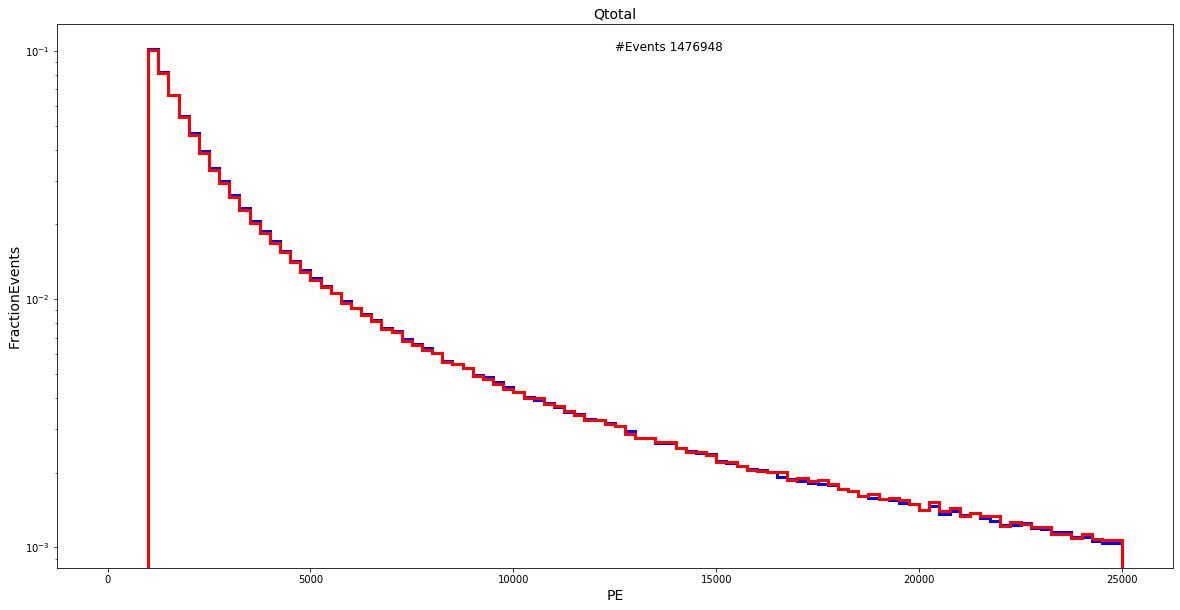

In [50]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Qtotal", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('PE', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['q_tot'], bins =100,  histtype = 'step',weights =w, edgecolor ='b', lw =3, range = [0,2.5*10**4], label = "Qtot")  
ax.hist(data_cont['q_tot'], bins =100,  histtype = 'step', weights =wc, edgecolor ='r', lw =3, range = [0,2.5*10**4], label = "Qtot")  

plt.show()

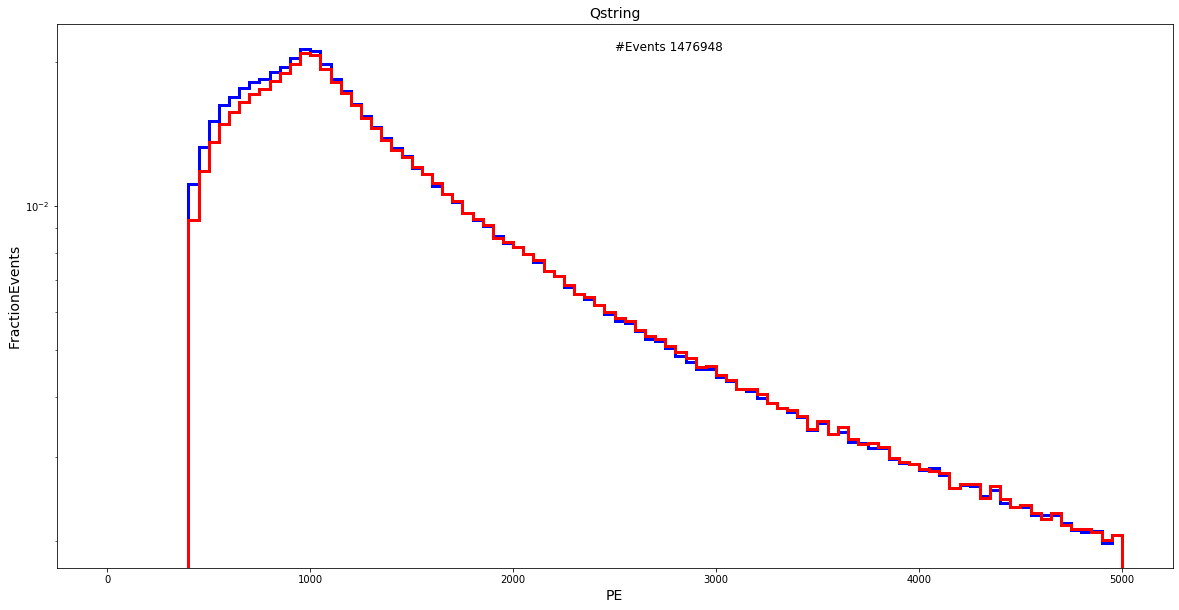

In [53]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Qstring", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('PE', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)    
ax.hist(data['q_st'], bins =100, histtype = 'step',edgecolor ='b', weights =w,  lw =3, range = [0,0.5*10**4], label = "Qtot")  
ax.hist(data_cont['q_st'], bins =100,  histtype = 'step', weights =wc, edgecolor ='r', lw =3, range = [0,0.5*10**4], label = "Qtot")  

plt.show()

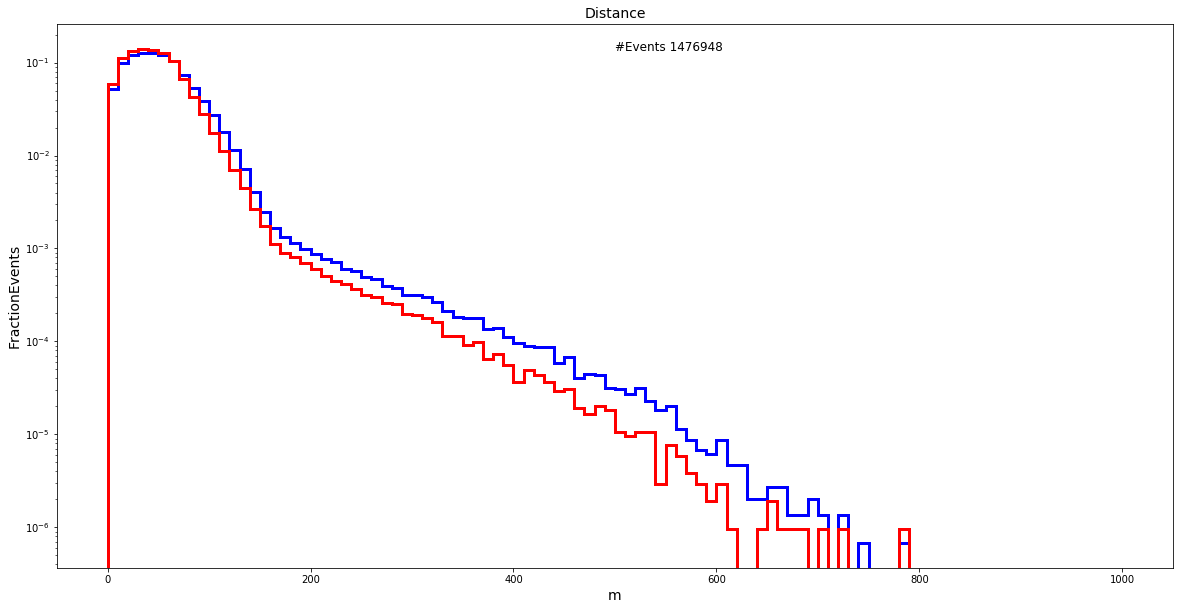

In [52]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Distance", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('m', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['distance'], bins =100, histtype = 'step', weights =w, edgecolor ='b', lw =3, range = [0,10**3], label = "Qtot")  
ax.hist(data_cont['distance'], bins =100, histtype = 'step', weights =wc, edgecolor ='r', lw =3, range = [0,10**3], label = "Qtot")  

plt.show()

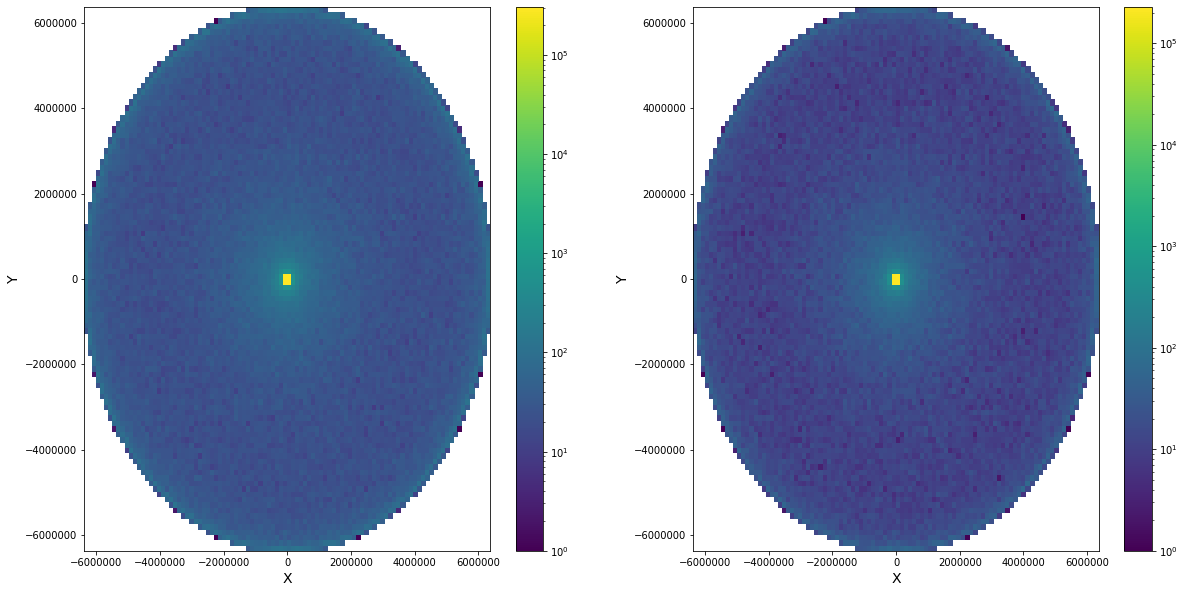

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2,sharex = True,sharey=True, figsize=(20,10))
plt.title('Neutrino vertex XY', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.subplot(1,2,1)
plt.hist2d(data['neutrino']['position'][:,0],data['neutrino']['position'][:,1],bins = 100 ,norm=mpl.colors.LogNorm())
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(1,2,2)
plt.hist2d(data_cont['neutrino']['position'][:,0],data_cont['neutrino']['position'][:,1], bins =100,norm=mpl.colors.LogNorm() )
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.show()

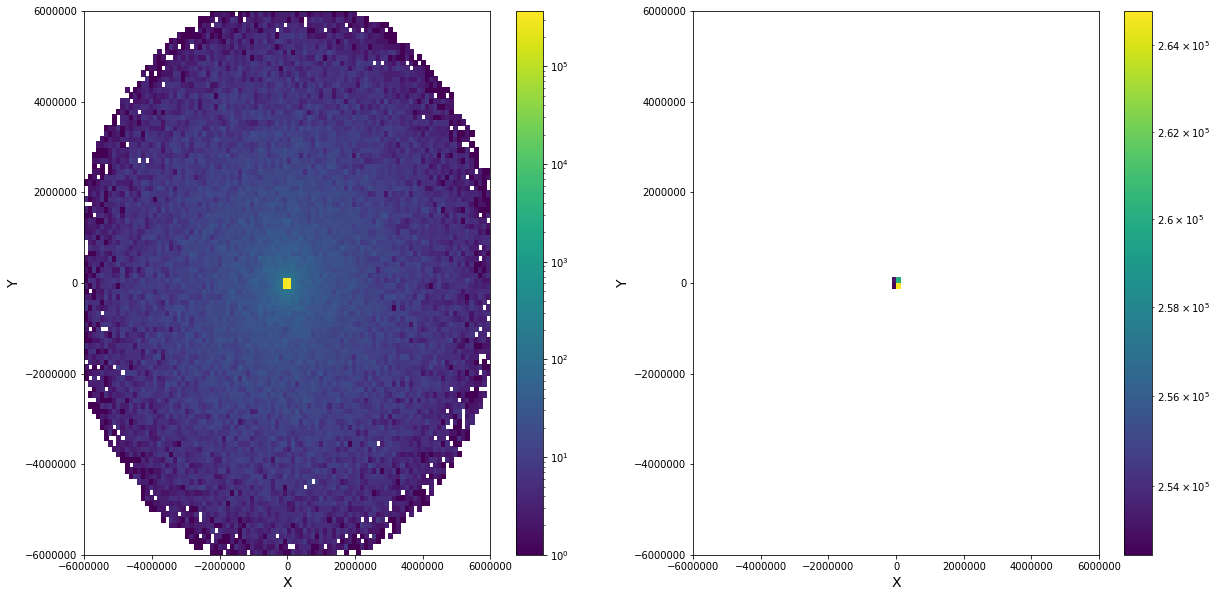

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=2,sharex = True,sharey=True, figsize=(20,10))
plt.title('Tau vertex XY', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(1,2,1)
plt.hist2d(data['meson']['position'][:,0],data['meson']['position'][:,1],bins = 100 ,norm=mpl.colors.LogNorm(), range=[[-6000000,6000000],[-6000000,6000000]])
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(1,2,2)
plt.hist2d(data_cont['meson']['position'][:,0],data_cont['meson']['position'][:,1], bins =100,norm=mpl.colors.LogNorm(), range=[[-6000000,6000000],[-6000000,6000000]])
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.show()
plt.show()

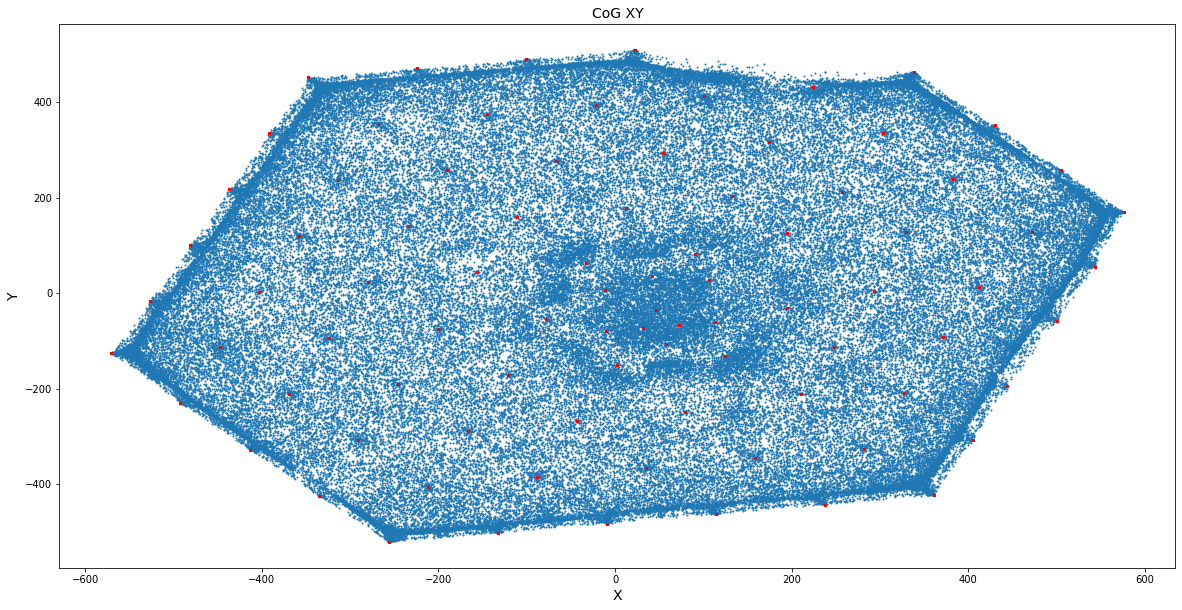

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('CoG XY', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.scatter(data['cog'][:,0],data['cog'][:,1], s = 1, )
plt.scatter(data['st_pos'][:,0],data['st_pos'][:,1], s = 2, c='red' )
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.show()


In [11]:
sbang = []
for i in data:
    spos = np.zeros(3)
    pos = i['meson']['position']
    di = i['meson']['direction']
    leng = i['meson']['length']
  #  print(pos,di,leng)
    spos[0] = pos[0]+np.sin(di[0])*np.cos(di[1])*leng
    spos[1] = pos[1]+np.sin(di[0])*np.sin(di[1])*leng
    spos[2] = pos[2]+np.cos(di[0])*leng
    sbang.append(spos)
sbang = np.array(sbang)
print(sbang.shape)

(1476948, 3)


In [12]:
sbang_cont = []
for i in data_cont:
    spos = np.zeros(3)
    pos = i['meson']['position']
    di = i['meson']['direction']
    leng = i['meson']['length']
  #  print(pos,di,leng)
    spos[0] = pos[0]+np.sin(di[0])*np.cos(di[1])*leng
    spos[1] = pos[1]+np.sin(di[0])*np.sin(di[1])*leng
    spos[2] = pos[2]+np.cos(di[0])*leng
    sbang_cont.append(spos)
sbang_cont = np.array(sbang_cont)
print(sbang_cont.shape)

(1030490, 3)


In [13]:
print(sbang[:10],sbang_cont[:10])

[[-1.73590820e+02  2.09830460e+02  7.11296265e+02]
 [ 5.59017090e+02  2.13953842e+02  1.25993271e+02]
 [-1.74333557e+02  4.86378632e+02  4.12011475e+02]
 [-1.96574768e+02 -4.22943085e+02 -2.26320129e+02]
 [ 3.36445435e+02 -1.87782791e+02  2.97112488e+02]
 [ 3.34930939e+02 -3.42657280e+01 -5.47299194e+02]
 [-4.31802155e+02 -3.85645660e+02 -1.73557114e+02]
 [ 2.06948225e+06  1.08660400e+06 -9.80329500e+06]
 [-3.17120483e+02  2.29401917e+02  1.81443176e+02]
 [ 1.77136459e+02 -2.16978546e+02 -3.32451294e+02]] [[-174.33355713  486.37863159  412.01147461]
 [-196.57476807 -422.94308472 -226.32012939]
 [ 336.44543457 -187.78279114  297.11248779]
 [-431.80215454 -385.6456604  -173.55711365]
 [-317.1204834   229.4019165   181.44317627]
 [ 177.13645935 -216.97854614 -332.45129395]
 [ 347.02474976  175.80361938 -226.73400879]
 [-283.16040039    1.78506327  130.06542969]
 [ 449.45944214 -187.24185181 -416.54989624]
 [ 329.51034546  407.57943726  449.14370728]]


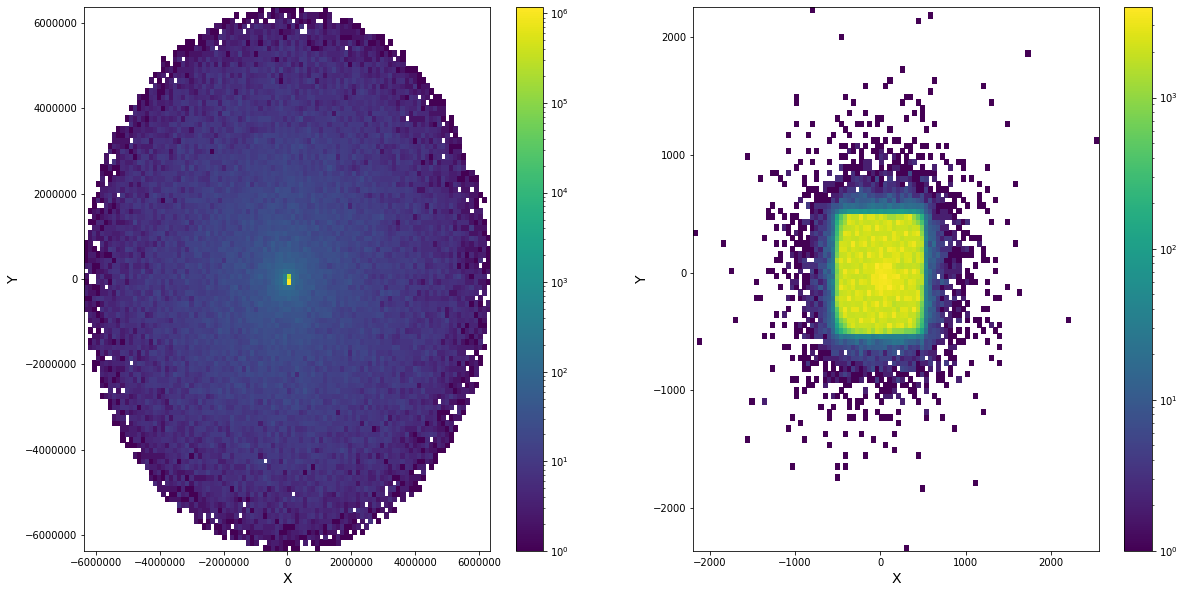

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2,sharex = True,sharey=True, figsize=(20,10))
plt.title('Neutrino vertex XY', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.subplot(1,2,1)
plt.hist2d(sbang[:,0],sbang[:,1],bins = 100 ,norm=mpl.colors.LogNorm())
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()
plt.subplot(1,2,2)
plt.hist2d(sbang_cont[:,0],sbang_cont[:,1], bins =100,norm=mpl.colors.LogNorm() )
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.show()

In [14]:
data_cont_2 = []
for i, e in enumerate(data):
    pos = e['meson']['position']
    pos2 = sbang[i]
    #print(pos, pos2)
    if np.all(pos < 500) & np.all(pos > -500) & np.all(pos2 < 500) & np.all(pos2 > -500):
        data_cont_2.append(e)
data_cont_2 = np.array(data_cont_2)
print(data_cont_2.shape)

(1010725,)


In [15]:
wc2 = np.ones(data_cont_2.shape[0])/data_cont_2.shape[0]

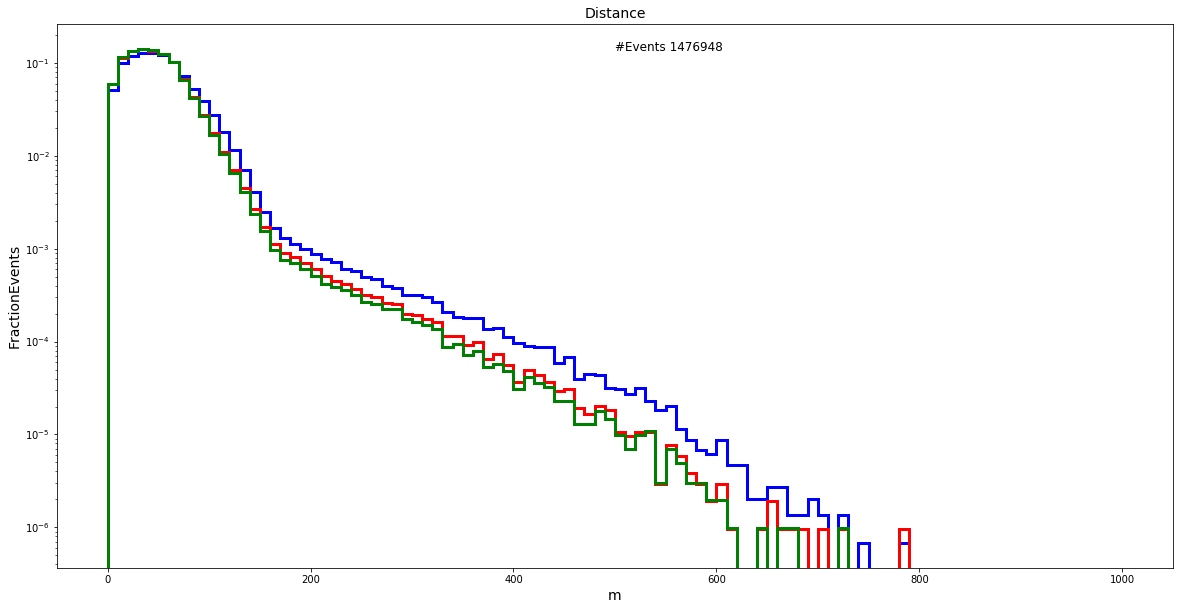

In [82]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Distance", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('m', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(data['distance'], bins =100, histtype = 'step', weights =w, edgecolor ='b', lw =3, range = [0,10**3], label = "Qtot")  
ax.hist(data_cont['distance'], bins =100, histtype = 'step', weights =wc, edgecolor ='r', lw =3, range = [0,10**3], label = "Qtot")  
ax.hist(data_cont_2['distance'], bins =100, histtype = 'step', weights =wc2, edgecolor ='g', lw =3, range = [0,10**3], label = "Qtot")  

plt.show()

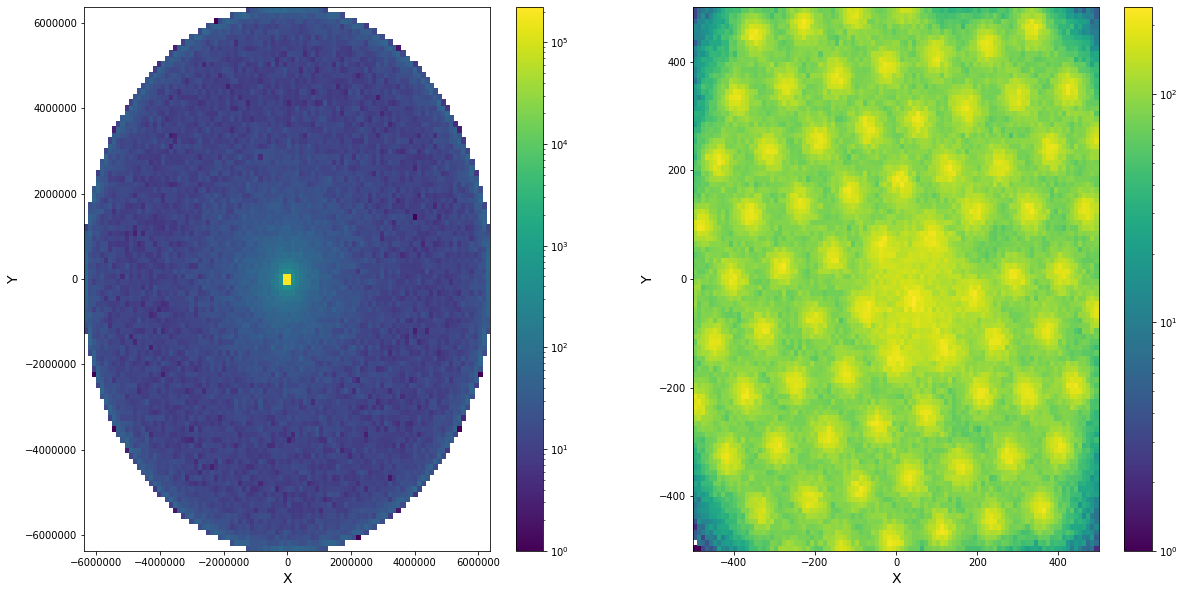

In [83]:
fig, ax = plt.subplots(nrows=1, ncols=2,sharex = True,sharey=True, figsize=(20,10))
plt.title('Neutrino vertex XY', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.subplot(1,2,1)
plt.hist2d(data_cont_2['neutrino']['position'][:,0],data_cont_2['neutrino']['position'][:,1],bins = 100 ,norm=mpl.colors.LogNorm())
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(1,2,2)
plt.hist2d(data_cont_2['meson']['position'][:,0],data_cont_2['meson']['position'][:,1], bins =100,norm=mpl.colors.LogNorm() )
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.show()

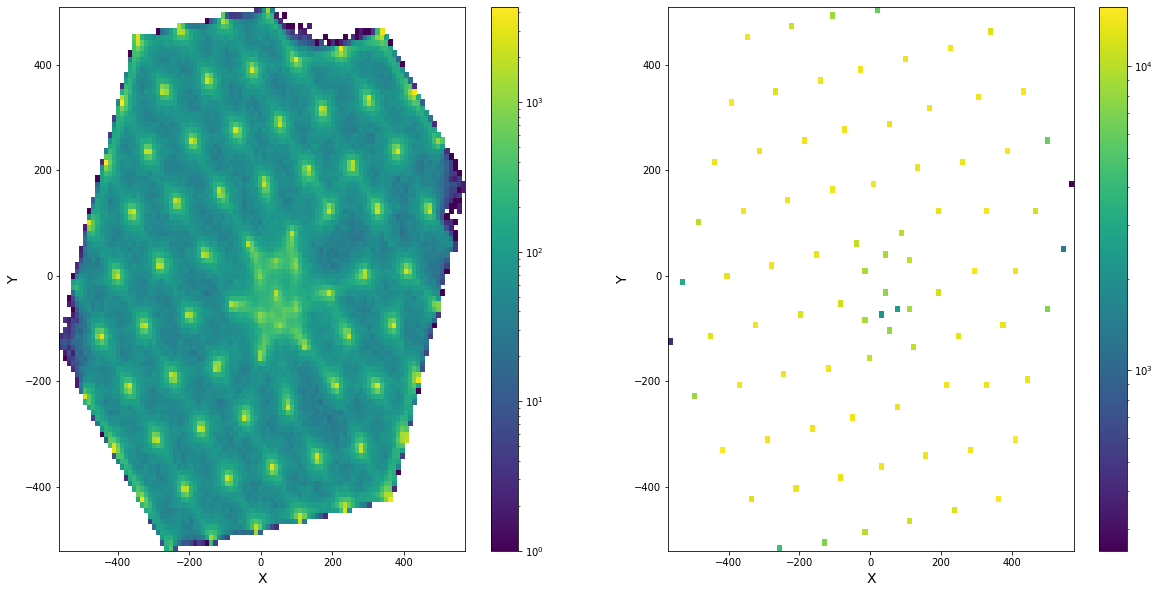

In [84]:
fig, ax = plt.subplots(nrows=1, ncols=2,sharex = True,sharey=True, figsize=(20,10))
plt.title('Neutrino vertex XY', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.subplot(1,2,1)
plt.hist2d(data_cont_2['cog'][:,0],data_cont_2['cog'][:,1],bins = 100 ,norm=mpl.colors.LogNorm())
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(1,2,2)
plt.hist2d(data_cont_2['st_pos'][:,0],data_cont_2['st_pos'][:,1], bins =100,norm=mpl.colors.LogNorm() )
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.show()

In [48]:
ldist = []
for i in data_cont_2:
    if i['distance']>150:
        ldist.append(np.array(i))
ldist = np.array(ldist)
print(ldist.shape)

(9071,)


In [52]:
ind = [i[0] for i in ldist['id']]
ind = np.array(ind)
#ind = sorted(ind)
#print(ind[:10])

In [53]:
ldist = ldist[ind.argsort()]
print(ldist['id'][:10])

[( 3, 4294967295, 542, 0) ( 8, 4294967295, 150, 0)
 ( 9, 4294967295, 399, 0) ( 9, 4294967295, 454, 1)
 ( 9, 4294967295, 550, 0) ( 9, 4294967295, 724, 0)
 (12, 4294967295, 476, 0) (15, 4294967295, 300, 0)
 (15, 4294967295, 448, 0) (16, 4294967295, 261, 0)]


In [54]:
sbang_2 = []
for i in ldist:
    spos = np.zeros(3)
    pos = i['meson']['position']
    di = i['meson']['direction']
    leng = i['meson']['length']
  #  print(pos,di,leng)
    spos[0] = pos[0]+np.sin(di[0])*np.cos(di[1])*leng
    spos[1] = pos[1]+np.sin(di[0])*np.sin(di[1])*leng
    spos[2] = pos[2]+np.cos(di[0])*leng
    sbang_2.append(spos)
sbang_2 = np.array(sbang_2)
print(sbang_2.shape)

(9071, 3)


In [18]:
wl = np.ones(ldist.shape[0])/ldist.shape[0]

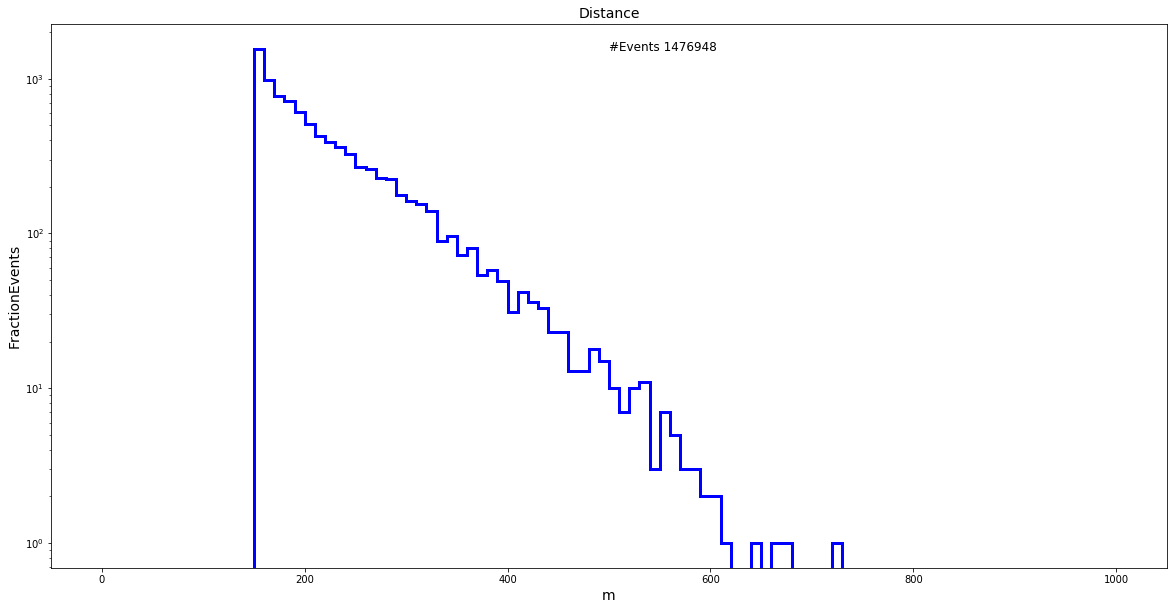

In [98]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Distance", fontsize = 14)
ax.text(0.5,0.95,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
ax.set_xlabel('m', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(ldist['distance'], bins =100, histtype = 'step', edgecolor ='b', lw =3, range = [0,10**3], label = "Qtot")  

plt.show()

In [19]:
print(ldist['neutrino']['energy'][:10])

[ 121239.67    38051.816 1661571.6    767218.75   964621.2   3323106.
  427456.34   102082.41   914269.25  1101414.1  ]


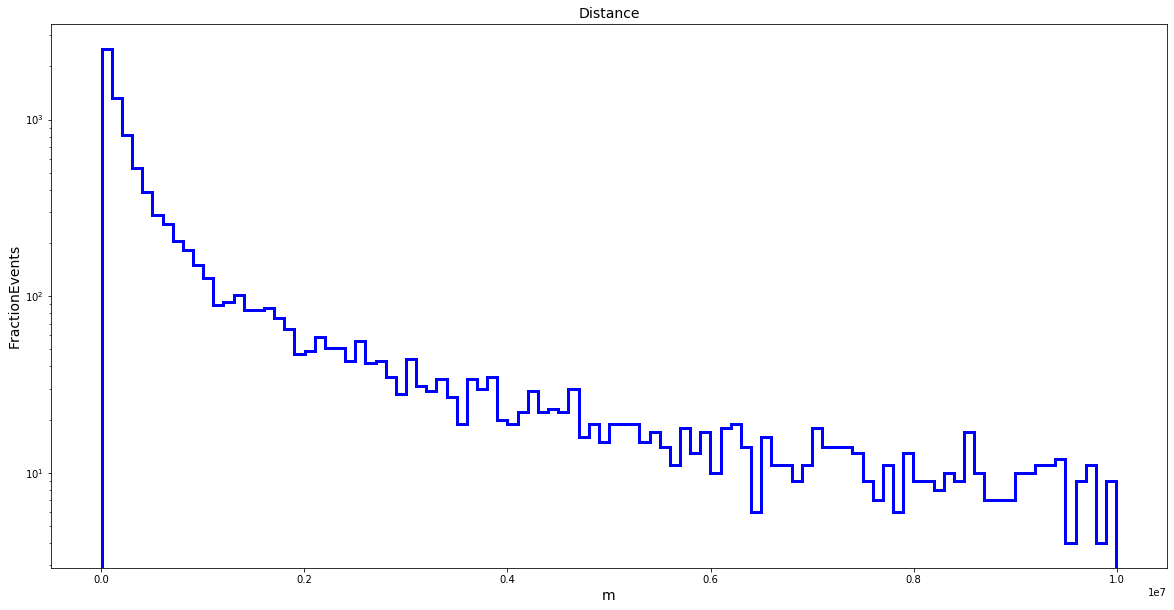

In [215]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
#plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Distance", fontsize = 14)
ax.set_xlabel('m', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(ldist['neutrino']['energy'], bins =100, histtype = 'step', edgecolor ='b', lw =3, label = "Qtot")  

plt.show()

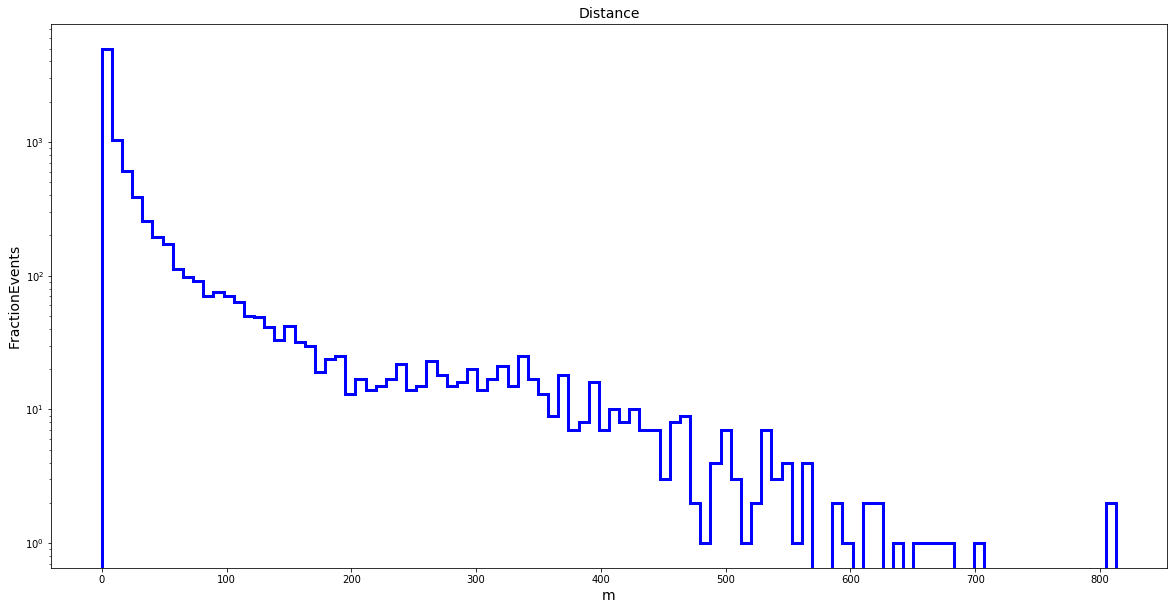

In [216]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
#plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Distance", fontsize = 14)
ax.set_xlabel('m', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(ldist['meson']['length'], bins =100, histtype = 'step', edgecolor ='b', lw =3, label = "Qtot")  

plt.show()

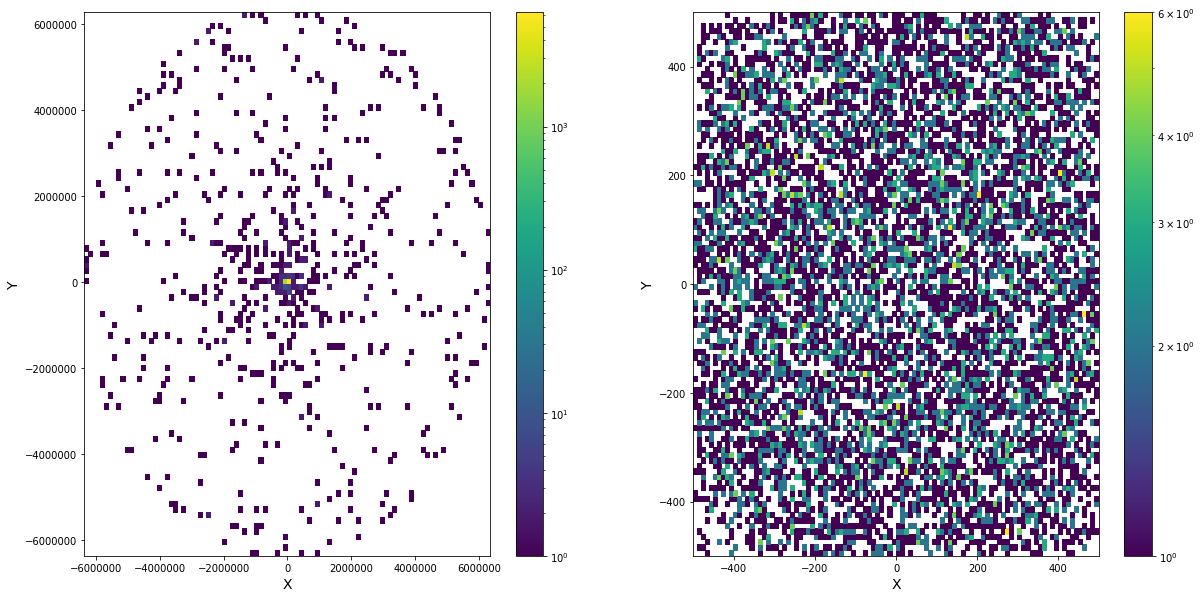

In [86]:
fig, ax = plt.subplots(nrows=1, ncols=2,sharex = True,sharey=True, figsize=(20,10))
plt.title('Neutrino vertex XY', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.subplot(1,2,1)
plt.hist2d(ldist['neutrino']['position'][:,0],ldist['neutrino']['position'][:,1],bins = 100 ,norm=mpl.colors.LogNorm())
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(1,2,2)
plt.hist2d(ldist['meson']['position'][:,0],ldist['meson']['position'][:,1], bins =100,norm=mpl.colors.LogNorm() )
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.show()

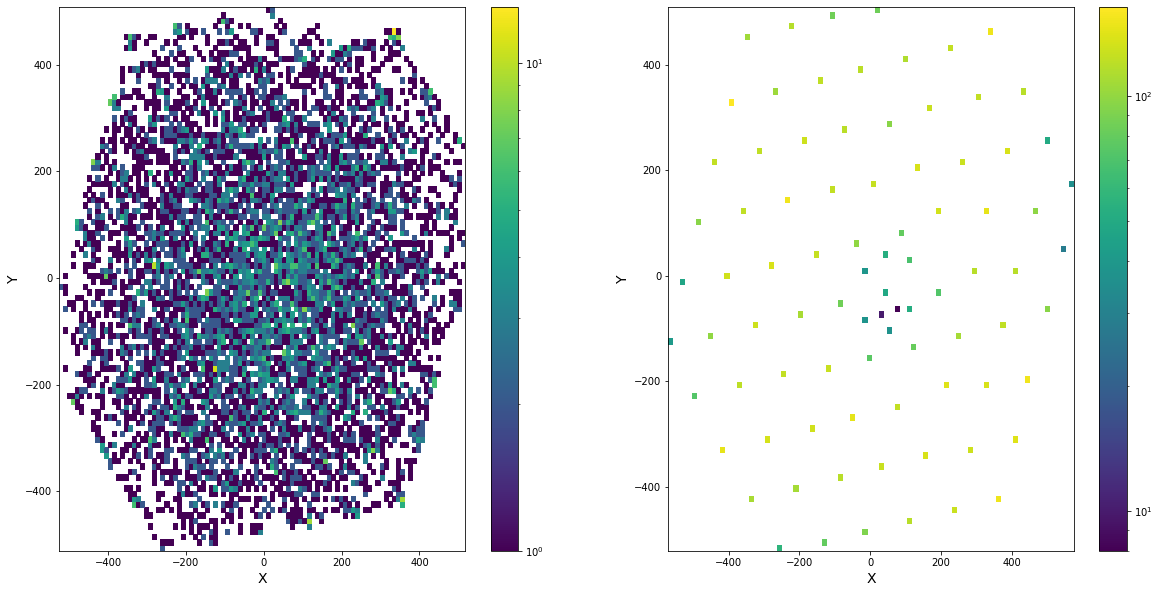

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=2,sharex = True,sharey=True, figsize=(20,10))
plt.title('Neutrino vertex XY', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.subplot(1,2,1)
plt.hist2d(ldist['cog'][:,0],ldist['cog'][:,1],bins = 100 ,norm=mpl.colors.LogNorm())
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.subplot(1,2,2)
plt.hist2d(ldist['st_pos'][:,0],ldist['st_pos'][:,1], bins =100,norm=mpl.colors.LogNorm() )
plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.colorbar()

plt.show()

In [20]:
strs = [(int(i[0]),int(i[1])) for i in ldist['st_pos']]
strs = set(strs)
x_strs = [i[0] for i in strs]
y_strs = [i[1] for i in strs]
print(x_strs,y_strs)

[132, -403, -77, -224, -43, -21, 72, 576, -166, 124, 35, 411, -101, 158, 46, 292, 237, -437, 472, 257, 224, 194, 544, -189, 282, -245, 79, 195, -156, -211, -9, -9, -234, 174, -570, 505, -413, 382, 338, 114, 106, 500, -290, 361, -334, -88, 31, 11, -347, 405, -121, -132, -481, 371, -111, -447, 1, -200, 429, 90, 330, 248, -66, -268, 113, -256, -145, -324, -526, 303, -492, -358, 210, 443, 22, 101, 57, 41, -313, -279, -392, 54, -32, 326, -10, -368] [202, 3, -54, 470, -267, 393, -66, 170, -287, -131, -364, 13, 490, -345, -34, 5, -442, 217, 127, 211, 432, -30, 55, 257, -325, -190, -248, 125, 43, -404, -481, -79, 140, 315, -125, 257, -327, 238, 463, -461, 27, -58, -307, -422, -424, -384, -72, 179, 451, -306, -171, -501, 101, -92, 159, -113, -150, -74, 351, 82, 127, -111, 276, 354, -60, -521, 374, -93, -15, 335, -230, 120, -209, -194, 509, 412, -105, 35, 237, 23, 334, 292, 62, -209, 6, -210]


In [28]:
from random import randint
colors = []

for i in range(100):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

(3, 4294967295, 542, 0)
(8, 4294967295, 150, 0)
(9, 4294967295, 399, 0)
(9, 4294967295, 454, 1)
(9, 4294967295, 550, 0)


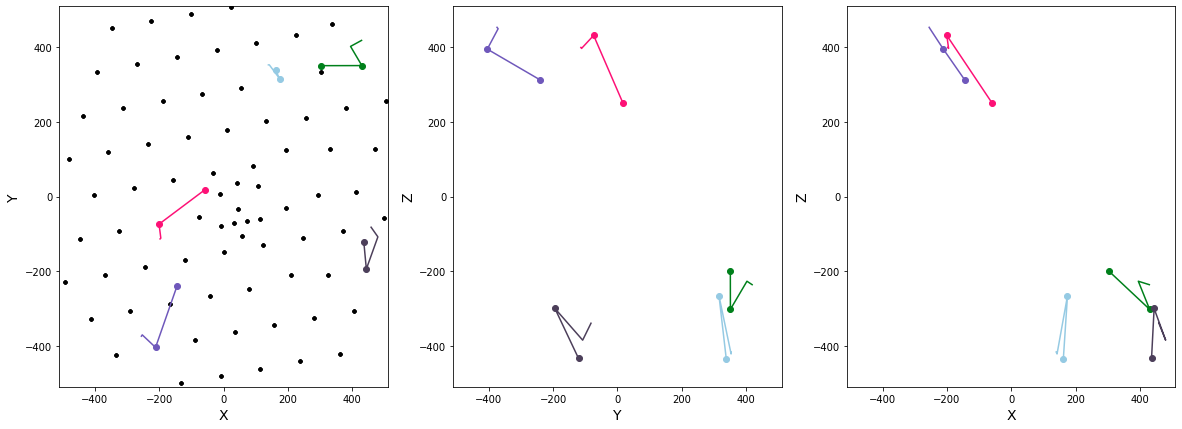

In [58]:
ylim = [-510,510]
xlim = [-510,510]
N=5
fig, ax = plt.subplots(nrows=1, ncols=3,sharex = True,sharey=True, figsize=(20,7))
plt.subplot(1,3,1)
for i in range(0, N):
    print(ldist['id'][i])
   
  # print(ldist['cog'][i],ldist['st_pos'][i])
    plt.scatter(x_strs, y_strs, color = 'k', marker = '.')
    plt.plot([ldist['cog'][i][0],ldist[i]['st_pos'][0],ldist['meson']['position'][i][0], sbang_2[i][0]], [ldist['cog'][i][1],ldist['st_pos'][i][1],ldist['meson']['position'][i][1], sbang_2[i][1]], 'o-' , color = colors[i], markevery=[0,1])
    plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylim(ylim)
    plt.xlim(xlim)
plt.subplot(1,3,2)
for i in range(0, N):
    plt.plot([ldist['cog'][i][1],ldist[i]['st_pos'][1],ldist['meson']['position'][i][1], sbang_2[i][1]], [ldist['cog'][i][2],ldist['st_pos'][i][2],ldist['meson']['position'][i][2], sbang_2[i][2]], 'o-', color = colors[i],markevery=[0,1])
    plt.xlabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylabel("Z",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylim(ylim)
    plt.xlim(xlim)
plt.subplot(1,3,3)
for i in range(0, N):
    plt.plot([ldist['cog'][i][0],ldist[i]['st_pos'][0],ldist['meson']['position'][i][0], sbang_2[i][0]], [ldist['cog'][i][2],ldist['st_pos'][i][2],ldist['meson']['position'][i][2], sbang_2[i][2]], 'o-', color = colors[i],markevery=[0,1])
    plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylabel("Z",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylim(ylim)
    plt.xlim(xlim)
plt.show()

(6001, 4294967295, 420, 0)


NameError: name 'colors' is not defined

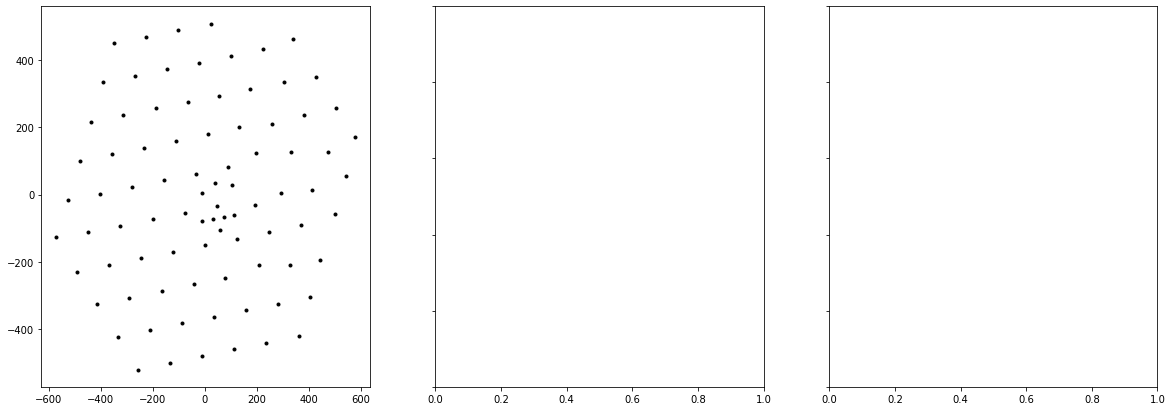

In [27]:
ylim = [-510,510]
xlim = [-510,510]
N=10
fig, ax = plt.subplots(nrows=1, ncols=3,sharex = True,sharey=True, figsize=(20,7))
plt.subplot(1,3,1)
for i in range(0, N):
    print(ldist['id'][i])
    plt.scatter(x_strs, y_strs, color = 'k', marker = '.')
    plt.plot([ldist[i]['st_pos'][0],ldist['meson']['position'][i][0], sbang_2[i][0]], [ldist['st_pos'][i][1],ldist['meson']['position'][i][1], sbang_2[i][1]], 'o-' , color = colors[i], markevery=[0])
    plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylim(ylim)
    plt.xlim(xlim)
plt.subplot(1,3,2)
for i in range(0, N):
    plt.plot([ldist[i]['st_pos'][1],ldist['meson']['position'][i][1], sbang_2[i][1]], [ldist['st_pos'][i][2],ldist['meson']['position'][i][2], sbang_2[i][2]], 'o-', color = colors[i],markevery=[0])
    plt.xlabel("Y",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylabel("Z",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylim(ylim)
    plt.xlim(xlim)
plt.subplot(1,3,3)
for i in range(0, N):
    plt.plot([ldist[i]['st_pos'][0],ldist['meson']['position'][i][0], sbang_2[i][0]], [ldist['st_pos'][i][2],ldist['meson']['position'][i][2], sbang_2[i][2]], 'o-', color = colors[i],markevery=[0])
    plt.xlabel("X",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylabel("Z",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
    plt.ylim(ylim)
    plt.xlim(xlim)
plt.show()

In [21]:
st_dist1 = []
st_dist2 = []
cog_dist1 = []
cog_dist2 = []

for i,d in enumerate(ldist):
    sd1 = np.sqrt((d['st_pos'][0]-d['meson']['position'][0])**2+(d['st_pos'][1]-d['meson']['position'][1])**2+(d['st_pos'][2]-d['meson']['position'][2])**2) 
    sd2 = np.sqrt((d['st_pos'][0]-sbang_2[i][0])**2+(d['st_pos'][1]-sbang_2[i][0])**2+(d['st_pos'][2]-sbang_2[i][0])**2) 
    cd1 = np.sqrt((d['cog'][0]-d['meson']['position'][0])**2+(d['cog'][1]-d['meson']['position'][1])**2+(d['cog'][2]-d['meson']['position'][2])**2) 
    cd2 = np.sqrt((d['cog'][0]-sbang_2[i][0])**2+(d['cog'][1]-sbang_2[i][0])**2+(d['cog'][2]-sbang_2[i][0])**2) 
   
    st_dist1.append(sd1)
    st_dist2.append(sd2)
    cog_dist1.append(cd1)
    cog_dist2.append(cd2)

st_dist1 = np.array(st_dist1)
st_dist2 = np.array(st_dist2)
cog_dist1 = np.array(cog_dist1)
cog_dist2 = np.array(cog_dist2)

print(st_dist1.shape)
print(st_dist2.shape)
print(cog_dist1.shape)
print(cog_dist2.shape)

(9071,)
(9071,)
(9071,)
(9071,)


In [22]:
print(st_dist1[0])

50.048954962774374


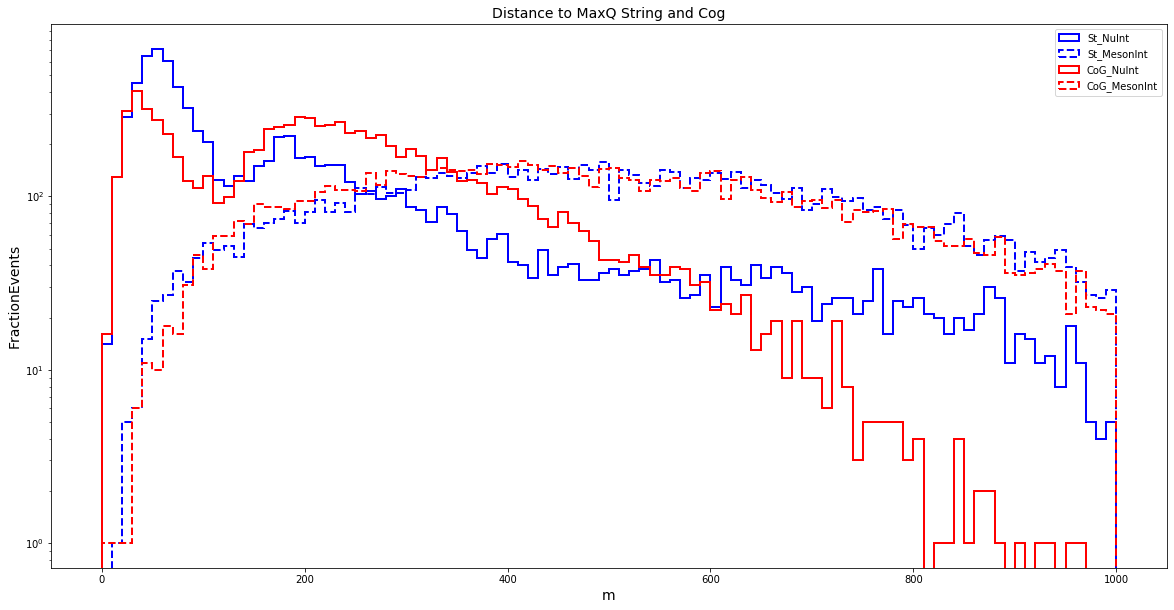

In [206]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_title("Distance to MaxQ String and Cog", fontsize = 14)
ax.set_xlabel('m', fontsize = 14)                                                              
ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
ax.hist(st_dist1, bins =100, histtype = 'step', edgecolor ='b', lw =2, range = [0,1*10**3], label = "St_NuInt")  
ax.hist(st_dist2, bins =100, histtype = 'step', edgecolor ='b', lw =2, ls = '--', range = [0,1*10**3], label = "St_MesonInt")  
ax.hist(cog_dist1, bins =100, histtype = 'step', edgecolor ='r', lw =2, range = [0,1*10**3], label = "CoG_NuInt")  
ax.hist(cog_dist2, bins =100, histtype = 'step', edgecolor ='r', lw =2, ls = '--', range = [0,1*10**3], label = "CoG_MesonInt")  
plt.legend()
plt.show()

(4294967280, 121239.67, [-1001.4488,  1460.3853,  1947.754 ], [0.74092025, 2.331993  ], 1354.424, 2485.821)
(16, 38051.816, [  66.17848, 2798.1982 , 1947.3855 ], [0.9164961, 1.5206093], -193.6609, 2937.225)
(16, 1661571.6, [-1015.8134,  1620.116 ,  1947.7131], [0.7606712, 2.2029939], 1986.0048, 2273.731)
(16, 767218.75, [-1436.0176,  1308.5631,  1947.704 ], [0.81929713, 2.597062  ], 3471.7595, 2649.7397)
(4294967280, 964621.2, [ 4747808.5,  1109685.5, -2266519.2], [2.0060005 , 0.22960193], -17924522., 5376507.5)
(16, 3323106., [ -482.39508, -2093.4612 ,  1947.638  ], [0.7518632, 4.668365 ], -478.40283, 3082.8503)
(16, 427456.34, [-5074.9844, -8141.685 ,  1940.78  ], [1.3477008, 4.1812944], -19774.053, 9648.613)
(4294967280, 102082.41, [ -289752.16, -6327429.  , -5658555.5 ], [2.299928, 4.666621], -28314954., 8492884.)
(4294967280, 914269.25, [ -93.364944,  -36.43967 , 1947.9993  ], [0.29751217, 3.841814  ], 2702.6614, 2067.831)
(16, 1101414.1, [1422.9019  ,   80.944275, 1947.8407  ], [

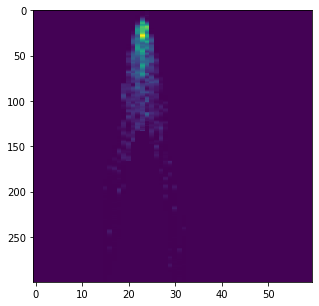

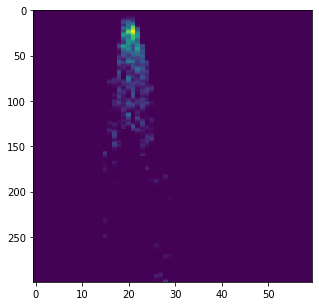

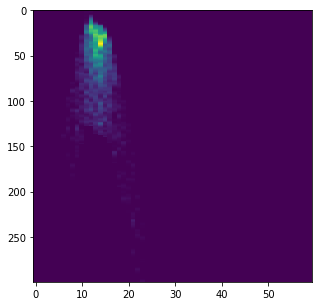

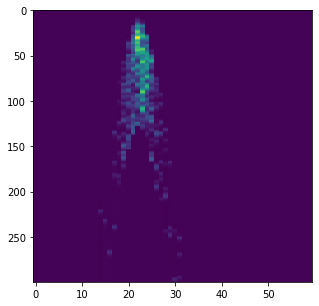

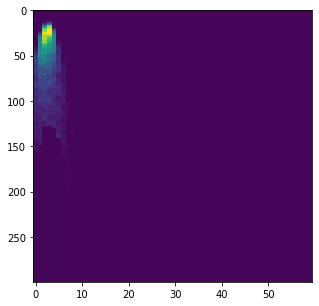

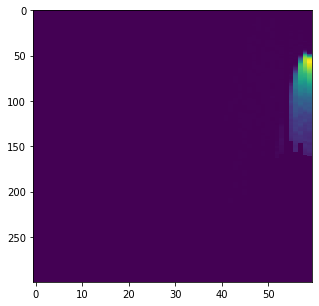

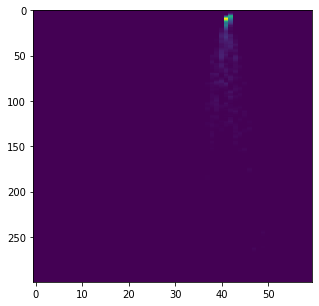

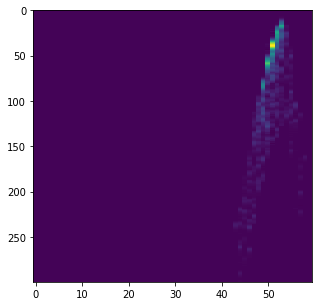

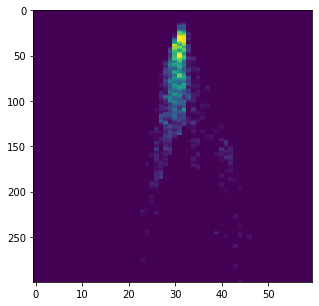

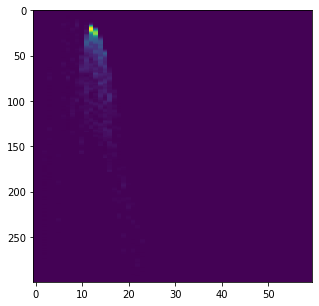

In [121]:
for i, im in enumerate(ldist['image'][:10]):
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.imshow(im.reshape(300,60), interpolation='nearest', aspect='auto', cmap= 'viridis')
    print(ldist['neutrino'][i])

In [23]:
for i, ids in enumerate(ldist['id'][:10]):
   # print(ids)
    for j,idd in enumerate(data['id']):
        if (idd[0] == ids[0]) and (idd[1] == ids[1]) and (idd[2] == ids[2]):
            print(idd, data['q_st'][j], data['distance'][j])

(6001, 4294967295, 420, 0) 1181.25 182.55125
(6002, 4294967295, 540, 0) 682.4 212.75891
(6003, 4294967295, 704, 0) 3224.325 239.3632
(6005, 4294967295, 318, 0) 869.95 179.912
(6006, 4294967295, 151, 0) 10294.1 186.43645
(6008, 4294967295, 235, 0) 37333.375 151.56502
(6008, 4294967295, 578, 0) 499.2 197.62115
(6009, 4294967295, 38, 0) 823.575 201.90955
(6010, 4294967295, 318, 0) 1686.25 150.2007
(6010, 4294967295, 440, 0) 1831.225 259.2492


In [24]:
print(data['id'][0][0])

6000


In [25]:
lardis = []
for i, row in enumerate(ldist):
    lardis.append(row['id'])
lardis = np.array(lardis)
print(lardis.shape)
print(lardis[:10])

(9071,)
[(6001, 4294967295, 420, 0) (6002, 4294967295, 540, 0)
 (6003, 4294967295, 704, 0) (6005, 4294967295, 318, 0)
 (6006, 4294967295, 151, 0) (6008, 4294967295, 235, 0)
 (6008, 4294967295, 578, 0) (6009, 4294967295,  38, 0)
 (6010, 4294967295, 318, 0) (6010, 4294967295, 440, 0)]


In [26]:
np.save('/home/dup193/work/double_pulse/large_dist.npy', lardis)

In [61]:
for i in ldist[:15]:
    print(i['id'],i['cog'],i['st_pos'],i['distance'])

(3, 4294967295, 542, 0) [-59.078053  17.513397 249.7114  ] [-200.55    -74.03    431.9375] 248.1952
(8, 4294967295, 150, 0) [ 302.20837  350.8144  -199.15785] [ 429.76     351.02    -302.34125] 164.06181
(9, 4294967295, 399, 0) [-144.9747  -240.64513  312.83875] [-211.35    -404.48     395.19308] 195.01227
(9, 4294967295, 454, 1) [ 161.62709  338.1203  -434.9598 ] [ 174.47     315.54    -266.15808] 170.78883
(9, 4294967295, 550, 0) [ 435.7084  -120.78177 -434.09195] [ 443.6765  -194.34348 -299.97348] 153.17499
(9, 4294967295, 724, 0) [-136.97928    11.120661  338.17117 ] [-200.55  -74.03  446.83] 151.98227
(12, 4294967295, 476, 0) [ -53.711582 -111.37603  -456.50998 ] [-121.77    -171.03    -322.29047] 161.88089
(15, 4294967295, 300, 0) [-182.80022 -139.0381    73.83316] [-324.39     -93.43     193.76176] 191.07758
(15, 4294967295, 448, 0) [  34.264896 -213.61377   -71.9157  ] [ -43.27     -267.52      107.873634] 203.08064
(16, 4294967295, 261, 0) [-159.11836 -274.40936  439.7837 ] [-